In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv(r'C:\Users\Rony\Downloads\Dataset .csv')



# 1. Determine the most common price range

In [2]:
price_range_counts = df['Price range'].value_counts()
most_common_price_range = price_range_counts.index[0]
print("Most Common Price Range:", most_common_price_range)
print("\nPrice Range Distribution:")
print(price_range_counts)


Most Common Price Range: 1

Price Range Distribution:
1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


# 2. Calculate average rating for each price range

In [3]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Rating by Price Range:")
print(avg_rating_by_price_range)


Average Rating by Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


# 3. Identify the color representing the highest average rating

In [4]:
rating_color_by_price_range = df.groupby('Price range')['Rating color'].agg(lambda x: x.value_counts().index[0])
print("\nMost Common Rating Color by Price Range:")
print(rating_color_by_price_range)


Most Common Rating Color by Price Range:
Price range
1    Orange
2    Orange
3    Yellow
4    Yellow
Name: Rating color, dtype: object


# Visualization of Average Ratings by Price Range

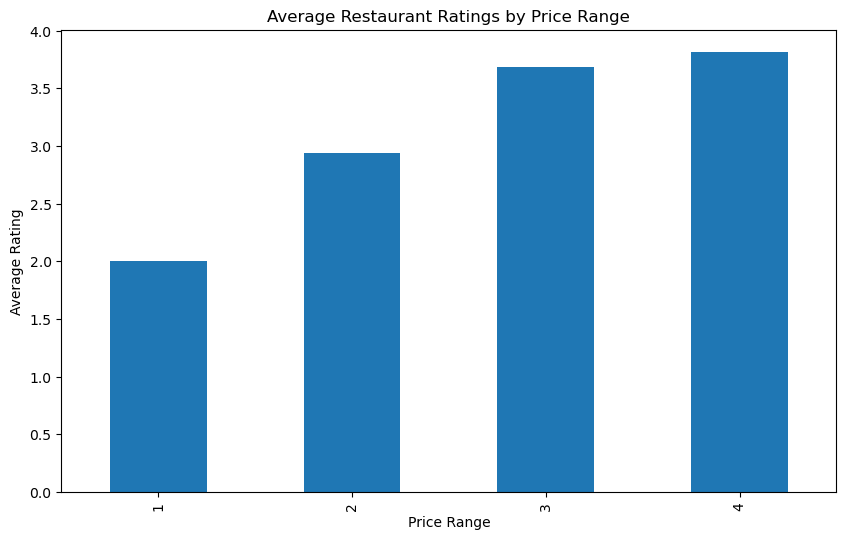

In [5]:
plt.figure(figsize=(10, 6))
avg_rating_by_price_range.plot(kind='bar')
plt.title('Average Restaurant Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

# Detailed Analysis Summary

In [6]:
print("\nDetailed Price Range Analysis:")
for price_range, avg_rating in avg_rating_by_price_range.items():
    count = price_range_counts[price_range]
    color = rating_color_by_price_range[price_range]
    print(f"Price Range {price_range}:")
    print(f"  - Total Restaurants: {count}")
    print(f"  - Average Rating: {avg_rating:.2f}")
    print(f"  - Most Common Rating Color: {color}")


Detailed Price Range Analysis:
Price Range 1:
  - Total Restaurants: 4444
  - Average Rating: 2.00
  - Most Common Rating Color: Orange
Price Range 2:
  - Total Restaurants: 3113
  - Average Rating: 2.94
  - Most Common Rating Color: Orange
Price Range 3:
  - Total Restaurants: 1408
  - Average Rating: 3.68
  - Most Common Rating Color: Yellow
Price Range 4:
  - Total Restaurants: 586
  - Average Rating: 3.82
  - Most Common Rating Color: Yellow


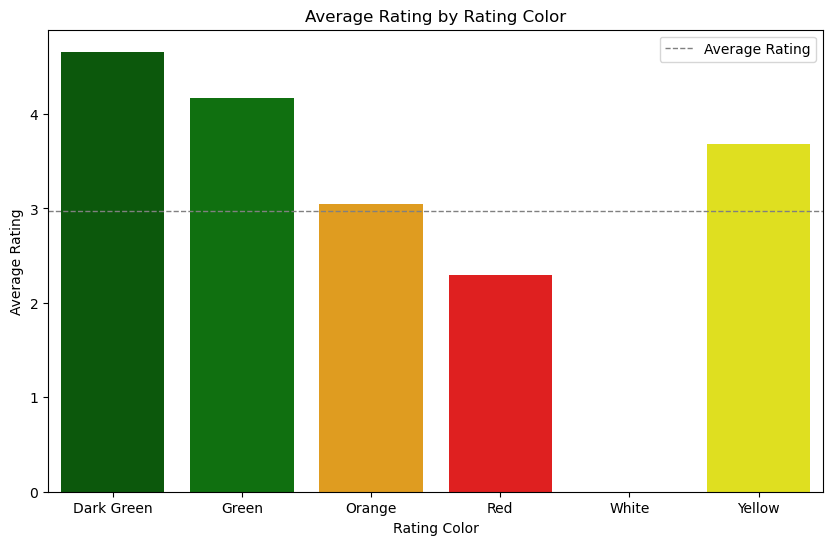

In [7]:
average_rating_by_color = df.groupby('Rating color') ['Aggregate rating'].mean()

#Create a dictionary mapping colors to their names

color_mapping = {

'Green': 'green',

'Dark Green': 'darkgreen', 'White': 'white', 'Orange': 'orange', 'Red': 'red', 'Yellow': 'yellow'

}

# Create the bar plot with custom colors

plt.figure(figsize=(10, 6))

sns.barplot(

x=average_rating_by_color.index,

y=average_rating_by_color.values, palette=[color_mapping.get(color, color) for color in average_rating_by_color.index] )

plt.title('Average Rating by Rating Color')

plt.xlabel('Rating Color')

plt.ylabel('Average Rating')

plt.axhline(y=average_rating_by_color.mean(), color ='gray', linestyle='--', linewidth=1, label='Average Rating')
plt.legend()
plt.show()